![image.png](https://i.imgur.com/a3uAqnb.png)

# Linear Regression for Walmart Sales Forecasting - Homework Assignment

In this homework, you will implement a **Linear Regression model** to predict weekly sales for Walmart stores using historical data. This project will help you understand the fundamentals of linear regression applied to time series forecasting.

## 📌 Project Overview
- **Task**: Predict weekly sales for Walmart stores
- **Algorithm**: Linear Regression
- **Dataset**: Walmart Store Sales dataset (provided)
- **Goal**: Build an accurate regression model using scikit-learn or custom implementation

## 📚 Learning Objectives
By completing this assignment, you will:
- Understand linear regression for forecasting problems
- Learn data preprocessing and feature engineering for time series
- Practice holiday feature creation and encoding
- Learn about regression metrics and model evaluation
- Understand train/test splitting for time series data

### Dataset Overview

You are provided with a CSV file named **`Walmart_Store_sales.csv`**, containing weekly sales data from **February 5, 2010** to **November 1, 2012**. The dataset includes the following columns:

1. **Store** — Store ID number
2. **Date** — Week of the sales
3. **Weekly\_Sales** — Weekly sales amount for the given store
4. **Holiday\_Flag** — Whether the week included a major holiday

   * `1` = Holiday week
   * `0` = Non-holiday week
5. **Temperature** — Temperature on the day of sale
6. **Fuel\_Price** — Cost of fuel in the region
7. **CPI** — Consumer Price Index
8. **Unemployment** — Unemployment rate in the region

## 1️⃣ Initial Setup and Library Installation

**Task**: Set up the environment and install necessary libraries.

In [1]:
from IPython.display import clear_output

In [2]:
# Incase you run this notebook outside colab (where the libraries aren't already pre-installed)

# %pip install pandas
# %pip install numpy
# %pip install scikit-learn
# %pip install matplotlib
# %pip install seaborn

clear_output()

## 2️⃣ Import Libraries and Configuration

**Task**: Import all necessary libraries and set up configuration parameters.

**Requirements**:
- Import data processing libraries (pandas, numpy)
- Import scikit-learn modules for regression and metrics
- Import visualization libraries
- Set random seeds for reproducibility
- Configure parameters for data splitting and model training

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Set random seed for reproducibility
np.random.seed(42)

# Configuration parameters
TEST_SIZE = 0.2              # Test set size (80:20 split)
RANDOM_STATE = 42           # Random state for reproducibility
SCALE_FEATURES = True       # Whether to scale features
PLOT_STYLE = 'seaborn'      # Plotting style

## 3️⃣ Data Loading and Exploration

**Task**: Load the Walmart sales dataset and explore its structure.

**Requirements**:
- Download and load the dataset
- Display basic information about the data
- Check for missing values and data types
- Understand the features and target variable
- Explore the date range and holiday patterns

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/walmart-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/ali/.cache/kagglehub/datasets/yasserh/walmart-dataset/versions/1


In [7]:
import os
os.listdir(path)

['Walmart.csv']

In [8]:
# Load the dataset
data_df = pd.read_csv(f"{path}/Walmart.csv")

# Display basic information about the dataset
print("Dataset loaded successfully!")
print(f"Dataset shape: {data_df.shape}")
print("\nColumn names:")
print(data_df.columns.tolist())

Dataset loaded successfully!
Dataset shape: (6435, 8)

Column names:
['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']


In [9]:
# Check the shape of the dataset
print(f"Dataset shape: {data_df.shape}")
print(f"Number of rows: {data_df.shape[0]}")
print(f"Number of columns: {data_df.shape[1]}")

# Display first few rows
print("\nFirst 5 rows:")
print(data_df.head())

# Check data types and info
print("\nDataset Info:")
print(data_df.info())

Dataset shape: (6435, 8)
Number of rows: 6435
Number of columns: 8

First 5 rows:
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 n

In [10]:
# Check for missing values
print("Missing values per column:")
print(data_df.isnull().sum())

# Display basic statistics
print("\nBasic Statistics:")
print(data_df.describe())

# Check unique stores and date range
print(f"\nNumber of unique stores: {data_df['Store'].nunique()}")
print(f"Store IDs: {sorted(data_df['Store'].unique())}")
print(f"\nDate range: {data_df['Date'].min()} to {data_df['Date'].max()}")
print(f"Number of unique dates: {data_df['Date'].nunique()}")

Missing values per column:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Basic Statistics:
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std    

## 4️⃣ Data Preprocessing and Feature Engineering

**Task**: Clean and prepare the data for linear regression training.

**Requirements**:
- Handle missing values if any
- Convert date column to datetime format
- Create holiday type features based on specific dates
- Extract time-based features from dates
- Handle categorical variables
- Prepare features and target variables

In [13]:
# Create a copy of the data for preprocessing
processed_data = data_df.copy()

# Check the date format first
print("Sample dates from the dataset:")
print(processed_data['Date'].head(10))

processed_data['Date'] = pd.to_datetime(processed_data['Date'], format='%d-%m-%Y')

# Handle any missing values (check if there are any)
print("\nMissing values after date conversion:")
print(processed_data.isnull().sum())


Sample dates from the dataset:
0    05-02-2010
1    12-02-2010
2    19-02-2010
3    26-02-2010
4    05-03-2010
5    12-03-2010
6    19-03-2010
7    26-03-2010
8    02-04-2010
9    09-04-2010
Name: Date, dtype: object

Missing values after date conversion:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [14]:
# Create holiday mapping function
def get_holiday_type(date):
    """
    Map dates to specific holiday types based on the given holiday dates:
    - Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
    - Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13  
    - Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
    - Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13
    """
    # Define holiday dates
    super_bowl_dates = ['2010-02-12', '2011-02-11', '2012-02-10', '2013-02-08']
    labour_day_dates = ['2010-09-10', '2011-09-09', '2012-09-07', '2013-09-06']
    thanksgiving_dates = ['2010-11-26', '2011-11-25', '2012-11-23', '2013-11-29']
    christmas_dates = ['2010-12-31', '2011-12-30', '2012-12-28', '2013-12-27']
    
    date_str = date.strftime('%Y-%m-%d')
    
    if date_str in super_bowl_dates:
        return 'Super Bowl'
    elif date_str in labour_day_dates:
        return 'Labour Day'
    elif date_str in thanksgiving_dates:
        return 'Thanksgiving'
    elif date_str in christmas_dates:
        return 'Christmas'
    else:
        return 'No Holiday'

# Apply holiday mapping to create new feature
processed_data['Holiday_Type'] = processed_data['Date'].apply(get_holiday_type)

# Display holiday distribution
print("Holiday Type Distribution:")
print(processed_data['Holiday_Type'].value_counts())
print("\nHoliday Flag vs Holiday Type crosstab:")
print(pd.crosstab(processed_data['Holiday_Flag'], processed_data['Holiday_Type']))

Holiday Type Distribution:
Holiday_Type
No Holiday      5985
Super Bowl       135
Labour Day       135
Thanksgiving      90
Christmas         90
Name: count, dtype: int64

Holiday Flag vs Holiday Type crosstab:
Holiday_Type  Christmas  Labour Day  No Holiday  Super Bowl  Thanksgiving
Holiday_Flag                                                             
0                     0           0        5985           0             0
1                    90         135           0         135            90


In [15]:
# Create additional time-based features
processed_data['Year'] = processed_data['Date'].dt.year
processed_data['Month'] = processed_data['Date'].dt.month
processed_data['Quarter'] = processed_data['Date'].dt.quarter
processed_data['Week_of_Year'] = processed_data['Date'].dt.isocalendar().week
processed_data['Day_of_Year'] = processed_data['Date'].dt.dayofyear

# Encode categorical variables (holiday types)
label_encoder = LabelEncoder()
processed_data['Holiday_Type_Encoded'] = label_encoder.fit_transform(processed_data['Holiday_Type'])

# Display the encoding mapping
holiday_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Holiday Type Encoding Mapping:")
for holiday, code in holiday_mapping.items():
    print(f"{holiday}: {code}")

# Display first few rows with new features
print("\nProcessed data with new features:")
print(processed_data[['Date', 'Holiday_Flag', 'Holiday_Type', 'Holiday_Type_Encoded', 'Year', 'Month', 'Quarter']].head(10))

print(f"\nProcessed data shape: {processed_data.shape}")

Holiday Type Encoding Mapping:
Christmas: 0
Labour Day: 1
No Holiday: 2
Super Bowl: 3
Thanksgiving: 4

Processed data with new features:
        Date  Holiday_Flag Holiday_Type  Holiday_Type_Encoded  Year  Month  \
0 2010-02-05             0   No Holiday                     2  2010      2   
1 2010-02-12             1   Super Bowl                     3  2010      2   
2 2010-02-19             0   No Holiday                     2  2010      2   
3 2010-02-26             0   No Holiday                     2  2010      2   
4 2010-03-05             0   No Holiday                     2  2010      3   
5 2010-03-12             0   No Holiday                     2  2010      3   
6 2010-03-19             0   No Holiday                     2  2010      3   
7 2010-03-26             0   No Holiday                     2  2010      3   
8 2010-04-02             0   No Holiday                     2  2010      4   
9 2010-04-09             0   No Holiday                     2  2010      4   

   Q

## 5️⃣ Data Splitting and Preprocessing

**Task**: Split the data and prepare features for linear regression.

**Requirements**:
- Separate features from target variable
- Split data into training and testing sets (80:20)
- Scale features if necessary
- Ensure proper data types for regression

In [16]:
# Separate features and target
# Target variable: Weekly_Sales
y = processed_data['Weekly_Sales']

# Features: All relevant columns except Date, Weekly_Sales, and Holiday_Type (keep encoded version)
feature_columns = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
                  'Holiday_Type_Encoded', 'Year', 'Month', 'Quarter', 'Week_of_Year', 'Day_of_Year']

X = processed_data[feature_columns]

# Display feature names and target info
print("Features selected:")
print(X.columns.tolist())
print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

print(f"\nTarget variable (Weekly_Sales) statistics:")
print(y.describe())

print(f"\nFirst few rows of features:")
print(X.head())

Features selected:
['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Holiday_Type_Encoded', 'Year', 'Month', 'Quarter', 'Week_of_Year', 'Day_of_Year']

Feature matrix shape: (6435, 12)
Target vector shape: (6435,)

Target variable (Weekly_Sales) statistics:
count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64

First few rows of features:
   Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
0      1             0        42.31       2.572  211.096358         8.106   
1      1             1        38.51       2.548  211.242170         8.106   
2      1             0        39.93       2.514  211.289143         8.106   
3      1             0        46.63       2.561  211.319643         8.106   
4      1             0        46.50       2.625  211.350143         8.106   

   Holiday

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE,
    shuffle=True
)

# Display split information
print("Data Split Information:")
print(f"Training set size: {X_train.shape[0]} samples ({(1-TEST_SIZE)*100:.0f}%)")
print(f"Test set size: {X_test.shape[0]} samples ({TEST_SIZE*100:.0f}%)")
print(f"Features: {X_train.shape[1]}")

print(f"\nTraining set shape: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Test set shape: X_test {X_test.shape}, y_test {y_test.shape}")

print(f"\nTarget variable ranges:")
print(f"Training set - Min: ${y_train.min():,.2f}, Max: ${y_train.max():,.2f}")
print(f"Test set - Min: ${y_test.min():,.2f}, Max: ${y_test.max():,.2f}")

Data Split Information:
Training set size: 5148 samples (80%)
Test set size: 1287 samples (20%)
Features: 12

Training set shape: X_train (5148, 12), y_train (5148,)
Test set shape: X_test (1287, 12), y_test (1287,)

Target variable ranges:
Training set - Min: $209,986.25, Max: $3,749,057.69
Test set - Min: $213,538.32, Max: $3,818,686.45


In [18]:
# Scale features if needed (optional but recommended)
if SCALE_FEATURES:
    scaler = StandardScaler()
    
    # Fit scaler on training data and transform both training and test sets
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Convert back to DataFrames to maintain feature names
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
    
    print("Feature scaling applied successfully!")
    print("Using scaled features for training...")
    
    # Use scaled features
    X_train_final = X_train_scaled
    X_test_final = X_test_scaled
    
else:
    print("No feature scaling applied.")
    X_train_final = X_train
    X_test_final = X_test

# Display shapes of final datasets
print(f"\nFinal training set shape: {X_train_final.shape}")
print(f"Final test set shape: {X_test_final.shape}")

print(f"\nSample of scaled training features:")
print(X_train_final.head())

Feature scaling applied successfully!
Using scaled features for training...

Final training set shape: (5148, 12)
Final test set shape: (1287, 12)

Sample of scaled training features:
         Store  Holiday_Flag  Temperature  Fuel_Price       CPI  Unemployment  \
1033 -1.164666     -0.268427     0.805778   -1.710883  1.103804     -0.897874   
915  -1.241656     -0.268427    -2.151085    0.018567  0.522548      0.438475   
5903  1.453006     -0.268427     0.043555   -0.511214 -1.146134      0.537246   
2083 -0.625733     -0.268427     0.473930    1.187587 -0.899892     -0.101831   
5943  1.453006     -0.268427     1.459731    0.830751 -1.077504      0.138957   

      Holiday_Type_Encoded      Year     Month   Quarter  Week_of_Year  \
1033             -0.006996 -1.225760  0.795570  0.490300      0.797897   
915              -0.006996  0.032508 -1.056243 -1.377303     -1.111978   
5903             -0.006996 -1.225760  1.412841  1.424102      1.363786   
2083             -0.006996  0.032

## 6️⃣ Model Training

**Task**: Train a linear regression model on the prepared data.

**Requirements**:
- Initialize Linear Regression model
- Train the model on training data
- Display model coefficients and intercept

In [19]:
# Initialize Linear Regression model
model = LinearRegression()

# Train the model
print("Training Linear Regression model...")
model.fit(X_train_final, y_train)

print("Model training completed successfully!")

# Display model information (coefficients, intercept)
print(f"\nModel Intercept: ${model.intercept_:,.2f}")

print(f"\nModel Coefficients:")
feature_coefficients = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

for idx, row in feature_coefficients.iterrows():
    print(f"{row['Feature']}: {row['Coefficient']:,.2f}")

print(f"\nNumber of features used: {len(model.coef_)}")

Training Linear Regression model...
Model training completed successfully!

Model Intercept: $1,044,996.41

Model Coefficients:
Month: 305,858.36
Store: -196,261.06
Quarter: -113,855.76
CPI: -84,713.47
Week_of_Year: -71,758.79
Day_of_Year: -71,539.15
Unemployment: -45,787.90
Holiday_Type_Encoded: 44,601.73
Temperature: -25,769.48
Fuel_Price: 15,501.84
Year: -13,971.52
Holiday_Flag: 6,678.21

Number of features used: 12


## 7️⃣ Model Evaluation

**Task**: Evaluate the trained model using appropriate regression metrics.

**Requirements**:
- Make predictions on both training and test sets
- Calculate Mean Absolute Error (MAE)
- Calculate Root Mean Squared Error (RMSE)
- Calculate R-squared score
- Compare training vs test performance

In [20]:
# Make predictions on training and test sets
print("Making predictions...")

y_train_pred = model.predict(X_train_final)
y_test_pred = model.predict(X_test_final)

print("Predictions completed!")
print(f"Training predictions shape: {y_train_pred.shape}")
print(f"Test predictions shape: {y_test_pred.shape}")

# Display sample predictions
print(f"\nSample Training Predictions vs Actual:")
for i in range(5):
    print(f"Actual: ${y_train.iloc[i]:,.2f}, Predicted: ${y_train_pred[i]:,.2f}, Difference: ${abs(y_train.iloc[i] - y_train_pred[i]):,.2f}")

print(f"\nSample Test Predictions vs Actual:")
for i in range(5):
    print(f"Actual: ${y_test.iloc[i]:,.2f}, Predicted: ${y_test_pred[i]:,.2f}, Difference: ${abs(y_test.iloc[i] - y_test_pred[i]):,.2f}")

Making predictions...
Predictions completed!
Training predictions shape: (5148,)
Test predictions shape: (1287,)

Sample Training Predictions vs Actual:
Actual: $836,707.85, Predicted: $1,261,467.94, Difference: $424,760.09
Actual: $558,963.83, Predicted: $1,270,499.36, Difference: $711,535.53
Actual: $588,592.61, Predicted: $912,297.82, Difference: $323,705.21
Actual: $605,413.17, Predicted: $1,261,600.02, Difference: $656,186.85
Actual: $526,641.23, Predicted: $836,838.94, Difference: $310,197.71

Sample Test Predictions vs Actual:
Actual: $1,138,800.32, Predicted: $1,192,315.57, Difference: $53,515.25
Actual: $1,304,850.67, Predicted: $1,128,810.09, Difference: $176,040.58
Actual: $1,769,296.25, Predicted: $1,269,765.80, Difference: $499,530.45
Actual: $1,077,640.13, Predicted: $1,194,605.14, Difference: $116,965.01
Actual: $428,851.99, Predicted: $729,833.17, Difference: $300,981.18


In [21]:
# Calculate evaluation metrics for training set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Calculate evaluation metrics for test set  
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

# Display results in a formatted way
print("="*60)
print("MODEL EVALUATION RESULTS")
print("="*60)

print(f"\nTRAINING SET PERFORMANCE:")
print(f"Mean Absolute Error (MAE):     ${train_mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${train_rmse:,.2f}")
print(f"R-squared (R²):                {train_r2:.4f}")

print(f"\nTEST SET PERFORMANCE:")
print(f"Mean Absolute Error (MAE):     ${test_mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${test_rmse:,.2f}")
print(f"R-squared (R²):                {test_r2:.4f}")

print(f"\nMODEL GENERALIZATION:")
print(f"MAE Difference (Test - Train):  ${test_mae - train_mae:,.2f}")
print(f"RMSE Difference (Test - Train): ${test_rmse - train_rmse:,.2f}")
print(f"R² Difference (Train - Test):   {train_r2 - test_r2:.4f}")

# Performance interpretation
if test_r2 > 0.7:
    print(f"\n✅ Good model performance (R² > 0.7)")
elif test_r2 > 0.5:
    print(f"\n⚠️  Moderate model performance (0.5 < R² < 0.7)")
else:
    print(f"\n❌ Poor model performance (R² < 0.5)")

MODEL EVALUATION RESULTS

TRAINING SET PERFORMANCE:
Mean Absolute Error (MAE):     $427,609.54
Root Mean Squared Error (RMSE): $517,900.32
R-squared (R²):                0.1553

TEST SET PERFORMANCE:
Mean Absolute Error (MAE):     $430,821.22
Root Mean Squared Error (RMSE): $518,785.22
R-squared (R²):                0.1646

MODEL GENERALIZATION:
MAE Difference (Test - Train):  $3,211.68
RMSE Difference (Test - Train): $884.90
R² Difference (Train - Test):   -0.0093

❌ Poor model performance (R² < 0.5)


## 8️⃣ Visualization and Analysis

**Task**: Create visualizations to analyze model performance and results.

**Requirements**:
- Plot predicted vs actual values
- Visualize feature importance (coefficients)
- Show sample predictions

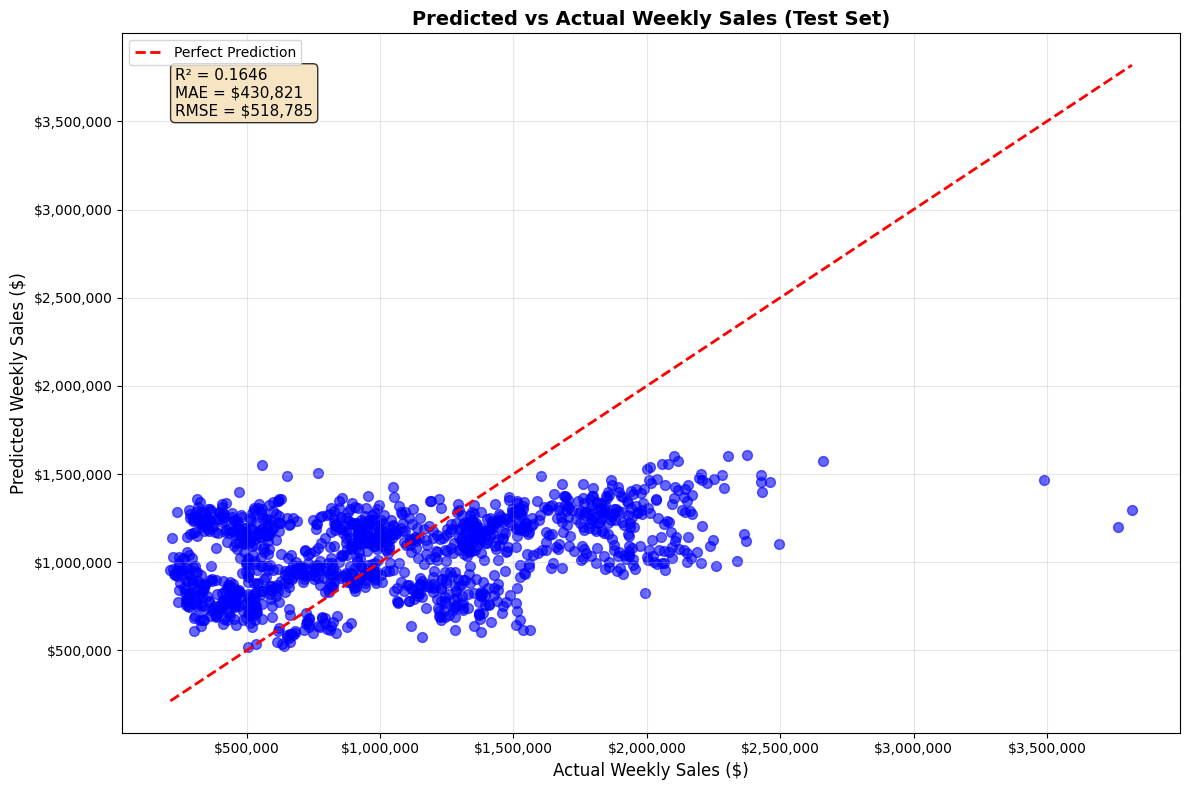

Prediction Accuracy:
Within 10% of actual value: 10.49%
Within 20% of actual value: 25.72%


In [22]:
# Create predicted vs actual scatter plot for test set
plt.figure(figsize=(12, 8))

# Create scatter plot
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue', s=50)

# Add perfect prediction line for reference
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')

# Formatting
plt.xlabel('Actual Weekly Sales ($)', fontsize=12)
plt.ylabel('Predicted Weekly Sales ($)', fontsize=12)
plt.title('Predicted vs Actual Weekly Sales (Test Set)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Add R² score to the plot
plt.text(0.05, 0.95, f'R² = {test_r2:.4f}\nMAE = ${test_mae:,.0f}\nRMSE = ${test_rmse:,.0f}', 
         transform=plt.gca().transAxes, fontsize=11, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Format axes with currency
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

# Calculate prediction accuracy within certain ranges
within_10_percent = np.abs((y_test - y_test_pred) / y_test) <= 0.1
within_20_percent = np.abs((y_test - y_test_pred) / y_test) <= 0.2

print(f"Prediction Accuracy:")
print(f"Within 10% of actual value: {within_10_percent.mean():.2%}")
print(f"Within 20% of actual value: {within_20_percent.mean():.2%}")

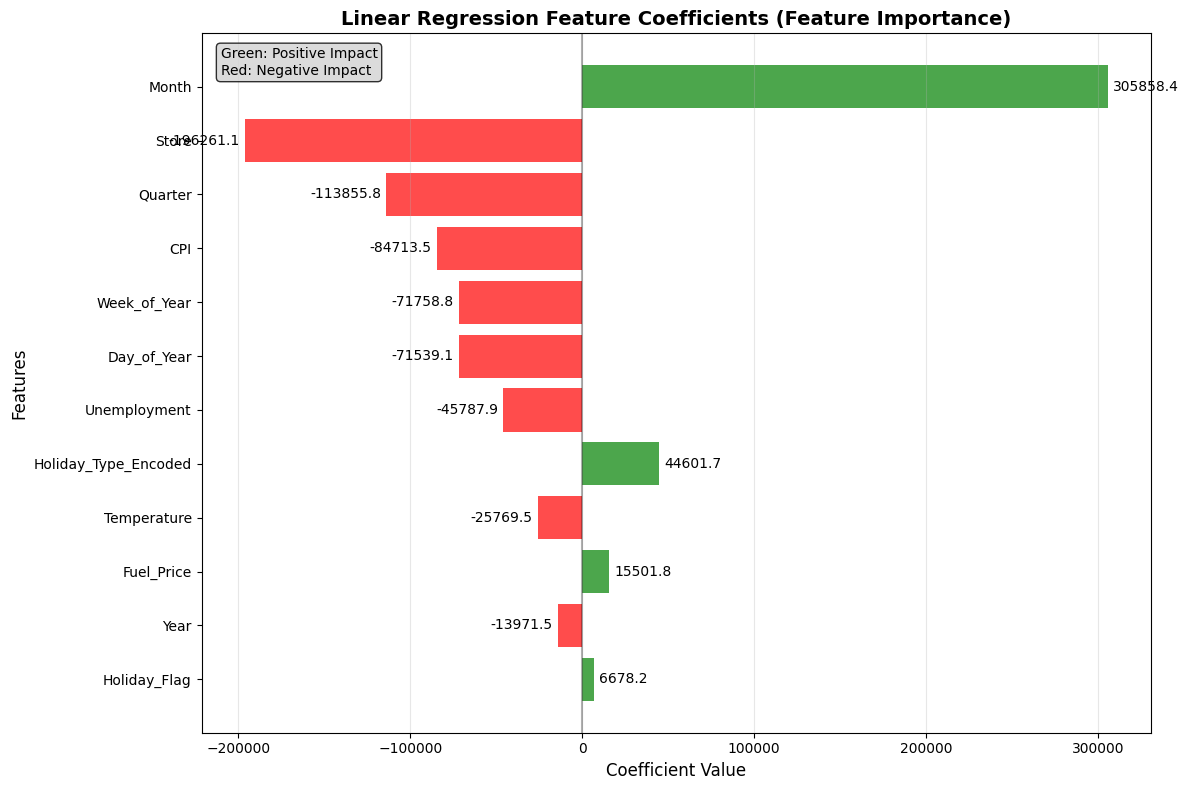

Top 5 Most Important Features (by absolute coefficient value):
Month: 305858.36 (increases sales)
Store: -196261.06 (decreases sales)
Quarter: -113855.76 (decreases sales)
CPI: -84713.47 (decreases sales)
Week_of_Year: -71758.79 (decreases sales)


In [23]:
# Visualize feature importance (model coefficients)
plt.figure(figsize=(12, 8))

# Get absolute coefficients for importance
feature_importance = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
}).sort_values('Abs_Coefficient', ascending=True)

# Create horizontal bar plot of feature coefficients
colors = ['red' if coef < 0 else 'green' for coef in feature_importance['Coefficient']]
bars = plt.barh(range(len(feature_importance)), feature_importance['Coefficient'], color=colors, alpha=0.7)

# Formatting
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Linear Regression Feature Coefficients (Feature Importance)', fontsize=14, fontweight='bold')
plt.yticks(range(len(feature_importance)), feature_importance['Feature'])
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3, axis='x')

# Add value labels on bars
for i, (bar, coef) in enumerate(zip(bars, feature_importance['Coefficient'])):
    plt.text(coef + (0.01 * max(feature_importance['Coefficient']) if coef >= 0 else -0.01 * max(feature_importance['Coefficient'])), 
             i, f'{coef:.1f}', 
             va='center', ha='left' if coef >= 0 else 'right', fontsize=10)

# Add legend
plt.text(0.02, 0.98, 'Green: Positive Impact\nRed: Negative Impact', 
         transform=plt.gca().transAxes, fontsize=10, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

plt.tight_layout()
plt.show()

# Display top 5 most important features
print("Top 5 Most Important Features (by absolute coefficient value):")
top_features = feature_importance.sort_values('Abs_Coefficient', ascending=False).head()
for idx, row in top_features.iterrows():
    impact = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"{row['Feature']}: {row['Coefficient']:.2f} ({impact} sales)")

In [24]:
# Show sample predictions vs actual values
print("="*80)
print("SAMPLE PREDICTIONS vs ACTUAL VALUES (First 10 Test Samples)")
print("="*80)

# Create a DataFrame for better visualization
sample_results = pd.DataFrame({
    'Actual_Sales': y_test.iloc[:10].values,
    'Predicted_Sales': y_test_pred[:10],
    'Difference': y_test.iloc[:10].values - y_test_pred[:10],
    'Absolute_Error': np.abs(y_test.iloc[:10].values - y_test_pred[:10]),
    'Percentage_Error': np.abs((y_test.iloc[:10].values - y_test_pred[:10]) / y_test.iloc[:10].values) * 100
})

# Display in a nice format
for i in range(10):
    actual = sample_results.iloc[i]['Actual_Sales']
    predicted = sample_results.iloc[i]['Predicted_Sales']
    diff = sample_results.iloc[i]['Difference']
    abs_error = sample_results.iloc[i]['Absolute_Error']
    pct_error = sample_results.iloc[i]['Percentage_Error']
    
    print(f"Sample {i+1:2d}:")
    print(f"  Actual:    ${actual:>10,.2f}")
    print(f"  Predicted: ${predicted:>10,.2f}")
    print(f"  Difference: ${diff:>9,.2f} ({pct_error:5.1f}% error)")
    print(f"  {'✅ Good' if pct_error <= 10 else '⚠️ Fair' if pct_error <= 20 else '❌ Poor'} prediction")
    print("-" * 50)

# Summary statistics for the sample
print(f"\nSAMPLE SUMMARY:")
print(f"Average Absolute Error: ${sample_results['Absolute_Error'].mean():,.2f}")
print(f"Average Percentage Error: {sample_results['Percentage_Error'].mean():.1f}%")
print(f"Best Prediction Error: {sample_results['Percentage_Error'].min():.1f}%")
print(f"Worst Prediction Error: {sample_results['Percentage_Error'].max():.1f}%")

SAMPLE PREDICTIONS vs ACTUAL VALUES (First 10 Test Samples)
Sample  1:
  Actual:    $1,138,800.32
  Predicted: $1,192,315.57
  Difference: $-53,515.25 (  4.7% error)
  ✅ Good prediction
--------------------------------------------------
Sample  2:
  Actual:    $1,304,850.67
  Predicted: $1,128,810.09
  Difference: $176,040.58 ( 13.5% error)
  ⚠️ Fair prediction
--------------------------------------------------
Sample  3:
  Actual:    $1,769,296.25
  Predicted: $1,269,765.80
  Difference: $499,530.45 ( 28.2% error)
  ❌ Poor prediction
--------------------------------------------------
Sample  4:
  Actual:    $1,077,640.13
  Predicted: $1,194,605.14
  Difference: $-116,965.01 ( 10.9% error)
  ⚠️ Fair prediction
--------------------------------------------------
Sample  5:
  Actual:    $428,851.99
  Predicted: $729,833.17
  Difference: $-300,981.18 ( 70.2% error)
  ❌ Poor prediction
--------------------------------------------------
Sample  6:
  Actual:    $1,004,523.59
  Predicted: $926

## 📝 Evaluation Criteria

Your homework will be evaluated based on:

1. **Implementation Correctness (50%)**
   - Proper data preprocessing and cleaning
   - Correct holiday feature engineering
   - Working linear regression implementation
   - Appropriate train/test splitting

2. **Model Performance (25%)**
   - Reasonable regression metrics (MAE, RMSE, R²)
   - Proper model evaluation and interpretation
   - Good generalization to test set

3. **Code Quality and Analysis (25%)**
   - Clean, readable code with comments
   - Meaningful visualizations and analysis
   - Proper interpretation of results
   - Good coding practices and documentation